In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 102kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 14 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

### Plan pracy

Celem zadania jest zaplanowanie planu pracy dla każdego z pracowników, tak aby zminimalizować koszty zatrudnienia pracowników.

Poniżej przedstawione są dane o dostępności pracowników, ich płacy oraz tabela w której wyodrębnione jest jaka liczba pracowników powinna być w danym dniu w sklepie.

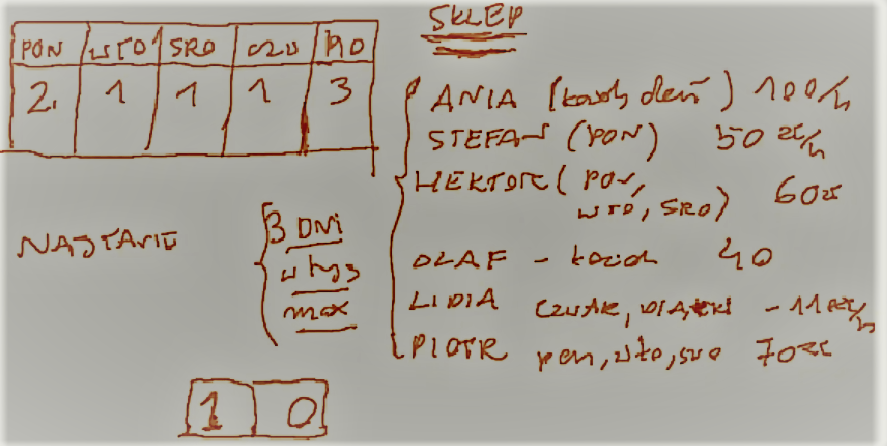

In [ ]:
from pulp import *
import pandas as pd
#print(pulp.__version__)

# Stworzenie problemu optymalizacji liniowej
prob = LpProblem("Minimalizacja_kosztow_pracy",LpMinimize)

dni = ["pon","wto","sro","czw","pia"]

# Przypisanie każdemu pracownikowi jego płacy oraz dostępności
pracownicy = {"Ania":{"Placa":100,"Obecnosc":["pon","wto","sro","czw","pia"]},
              "Stefan":{"Placa":50,"Obecnosc":["pon"]},
              "Hektor":{"Placa":60,"Obecnosc":["pon","wto","sro"]},
              "Olaf":{"Placa":40,"Obecnosc":["pon","wto","sro","czw","pia"]},
              "Lidia":{"Placa":11,"Obecnosc":["czw","pia"]},
              "Piotr":{"Placa":70,"Obecnosc":["pon","wto","sro"]}
              }
# Minimalna liczba pracowników w sklepie w dany dzień
min_osob = {"pon":2,"wto":1,"sro":1,"czw":1,"pia":3}

czas_pracy = 4

#okreslenie zmiennych decyzyjnych
vars = LpVariable.dicts("vars",(pracownicy.keys(), dni),lowBound=0,upBound=1,cat='Integer')

# Ograniczenia co do dostępności poszczególnych pracowników, minimalnej liczby osób danego dnia oraz ograniczenia co do liczby przepracowanych dni
for osoba in pracownicy:
  temp = 0
  for dzien in dni:
    if dzien not in pracownicy[osoba]["Obecnosc"]:
      temp += vars[osoba][dzien]
  prob += temp == 0

for dzien in dni:
  prob += lpSum(vars[osoba][dzien] for osoba in pracownicy) >= min_osob[dzien]

for osoba in pracownicy:
  prob += lpSum(vars[osoba][dzien] for dzien in dni) <= 3
  prob += lpSum(vars[osoba][dzien] for dzien in dni) >= 1

# Obliczenie kosztu wypłaty dla pracowniów
prob += czas_pracy*lpSum(pracownicy[osoba]["Placa"]*lpSum(vars[osoba][dzien] for dzien in dni) for osoba in pracownicy)

prob.writeLP("sklep.lp")
prob.solve()

#!cat "sklep.lp"

# Wyświetlenie tygodniowego kosztu na wypłaty oraz planu pracy dla pracowników

print("Tygodniowy koszt wypłaty to:", value(prob.objective), "zł", "\n\n")

output = []
for osoba in pracownicy:
  output.append([int(vars[osoba][dzien].varValue) for dzien in dni])
output_df = pd.DataFrame(output, columns = dni, index = pracownicy.keys())
output_df


Tygodniowy koszt wypłaty to: 1528.0 zł 




,pon,wto,sro,czw,pia
Ania,0,0,0,0,1
Stefan,1,0,0,0,0
Hektor,0,1,0,0,0
Olaf,1,0,0,0,1
Lidia,0,0,0,1,1
Piotr,0,0,1,0,0
